In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
setwd('/import/liujing/data/my')

In [2]:
load('../expr.rda')

In [3]:
library(dplyr) 
colnames(expr) = gsub('-','.',colnames(expr))
head(expr,2)
Type
x = as.matrix(expr)
y = Type


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,MSLN,HBE1,OTOF,EGR1,HIST1H3F,SAMD14,IGF2,LRP1,PVRL2,GP1BA,...,ZNF268,ZNF141,ZNF441,PPP4R4,DYNLT3,ZDBF2,RPS20,ETAA1,HIST1H2BM,ZNF721
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10_M1,0.001604972,0.13897265,0.6439801,0.4818834,3.334643,0.1074810,0.01531470,6.989592,0.8880691,0.5674804,...,3.797805,12.710151,6.700506,0.2433729,7.730019,1.555564,167.52943,8.471657,10.420602,8.706591
CI11_M1,0.001604972,0.06789091,0.1319284,0.3343645,2.322905,0.4015254,0.08084769,8.119331,0.7771147,2.6697039,...,1.390438,5.253768,2.643442,0.1660712,3.472727,0.799147,84.14582,4.166570,3.172594,1.990680


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

In [4]:
y

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

In [5]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [6]:
set.seed(101)

In [7]:
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

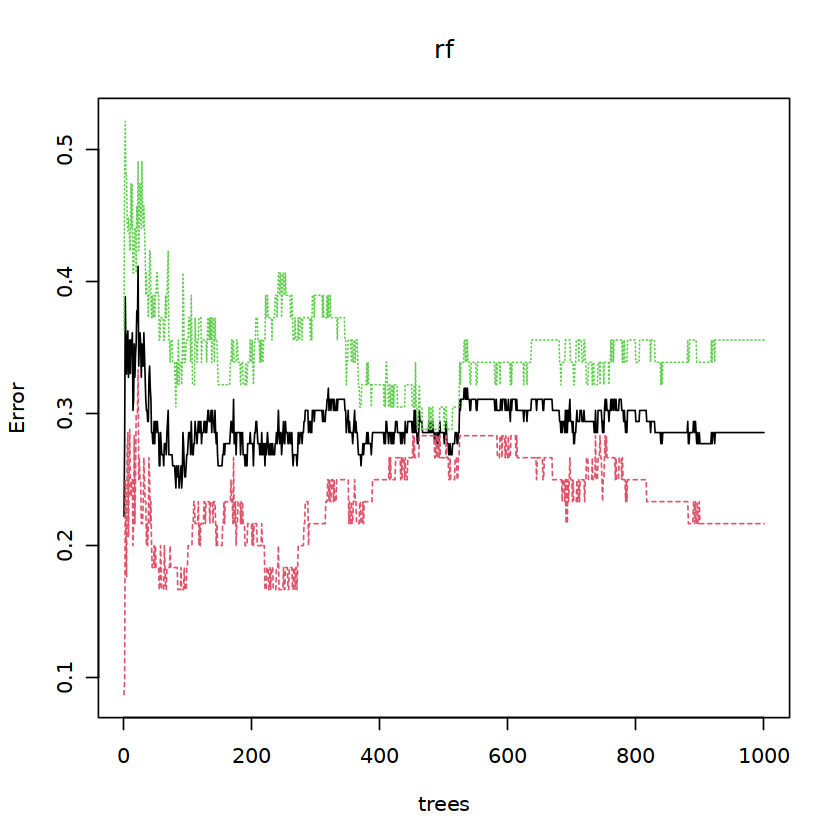

In [8]:
plot(rf)

In [9]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [10]:
trees = which.min(rf$err.rate[,1])

In [11]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [12]:
importance = importance(rf)

In [13]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [14]:
# RPE65 + MC3R+NFIL3 + PRF1 + IL6

In [15]:
options(repr.plot.width = 4)

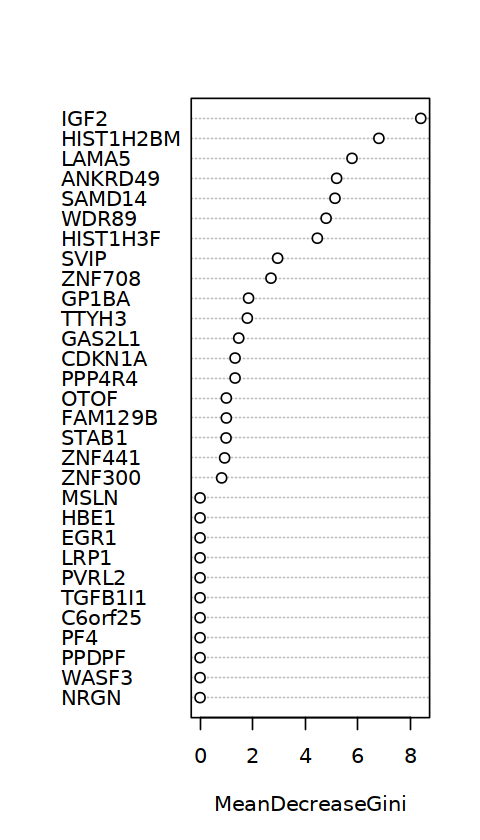

In [16]:
varImpPlot(rf,main = '')

In [17]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [18]:
rfGenes

IGF2 HIST1H2BM     LAMA5   ANKRD49    SAMD14     WDR89  HIST1H3F      SVIP 
8.4040737 6.8091467 5.7857143 5.2000775 5.1377778 4.8000000 4.4656801 2.9538462 
   ZNF708     GP1BA     TTYH3    GAS2L1    CDKN1A    PPP4R4      OTOF   FAM129B 
2.7000000 1.8461538 1.8000000 1.4727273 1.3333333 1.3333333 1.0000000 1.0000000 
    STAB1    ZNF441    ZNF300      MSLN      HBE1      EGR1      LRP1     PVRL2 
0.9904762 0.9354839 0.8220919 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 
  TGFB1I1   C6orf25       PF4     PPDPF     WASF3      NRGN     EGFL7      RIN1 
0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 
     ESAM    PKMYT1     PTGS1      RCN3     MMP14     TOR4A       GAA   SLC19A1 
0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 
   FERMT3  TMEM150B    PLXNB2      TLN1    COMMD6    MRPL32     MRPL3      RBAK 
0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 
    ZNF91    ZNF260   CEACAM1    ZNF737    ZNF268    ZNF141    DYNLT3     ZDBF2 
0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 
    RPS20     ETAA1    ZNF721 
0.0000000 0.0000000 0.0000000

In [19]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# expr2 = exp4

# sigExp=expr2[rfGenes,]
# write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# rfGenes

### svm

In [20]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [21]:
library(Boruta)

In [22]:
# x = as.matrix(expr)
# y = ifelse(Type == 'Control',0,1)

In [23]:
y

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

In [24]:
set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [25]:
boruta

Boruta performed 98 iterations in 5.201958 secs.
 12 attributes confirmed important: CDKN1A, CEACAM1, ESAM, HBE1,
HIST1H2BM and 7 more;
 47 attributes confirmed unimportant: ANKRD49, C6orf25, COMMD6, DYNLT3,
EGFL7 and 42 more;

In [26]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        0        12        47 

In [27]:
boruta$finalDecision

MSLN      HBE1      OTOF      EGR1  HIST1H3F    SAMD14      IGF2      LRP1 
Confirmed Confirmed  Rejected  Rejected Confirmed  Rejected  Rejected Confirmed 
    PVRL2     GP1BA    GAS2L1   TGFB1I1   C6orf25    CDKN1A       PF4     PPDPF 
 Rejected  Rejected  Rejected Confirmed  Rejected Confirmed  Rejected Confirmed 
    WASF3      NRGN     EGFL7      RIN1      ESAM    PKMYT1     PTGS1     LAMA5 
 Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected  Rejected 
     RCN3     MMP14     STAB1     TTYH3     TOR4A       GAA   SLC19A1    FERMT3 
Confirmed  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
 TMEM150B   FAM129B    PLXNB2      TLN1    COMMD6    MRPL32     MRPL3      SVIP 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
   ZNF708      RBAK     WDR89     ZNF91    ZNF300    ZNF260   ANKRD49   CEACAM1 
 Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected Confirmed 
   ZNF737    ZNF268    ZNF141    ZNF441    PPP4R4    DYNLT3     ZDBF2     RPS20 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    ETAA1 HIST1H2BM    ZNF721 
 Rejected Confirmed  Rejected 
Levels: Tentative Confirmed Rejected

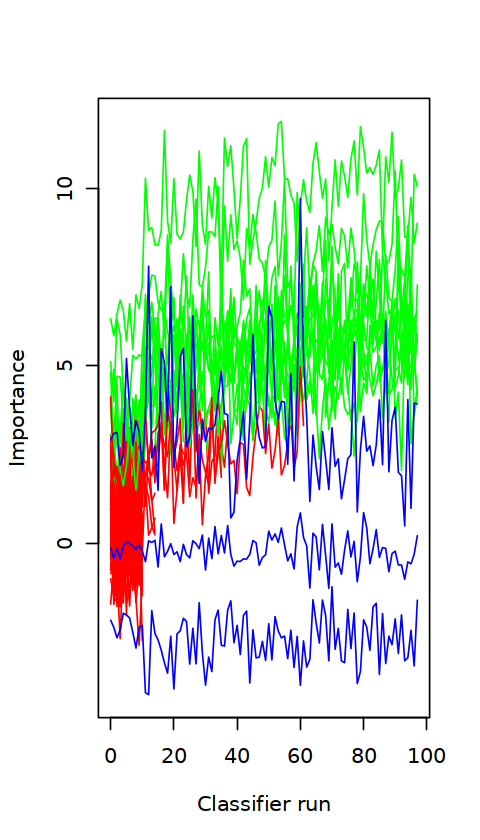

In [28]:
Boruta::plotImpHistory(boruta)

In [29]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


In [30]:
boruta

Boruta performed 98 iterations in 5.201958 secs.
 12 attributes confirmed important: CDKN1A, CEACAM1, ESAM, HBE1,
HIST1H2BM and 7 more;
 47 attributes confirmed unimportant: ANKRD49, C6orf25, COMMD6, DYNLT3,
EGFL7 and 42 more;

Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




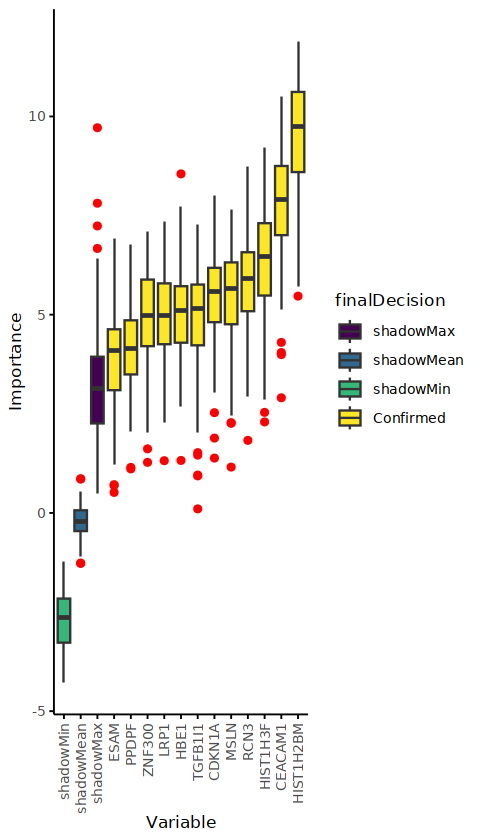

In [31]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [32]:
expr = cbind(Type,expr)

In [33]:
colnames(expr)[1]  ='Group'

In [34]:
expr3 = expr

In [35]:
set.seed(147)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [36]:
table(test$Group)


 0  1 
20 19 

In [37]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'Matrix' was built under R version 4.2.3"


In [38]:
train_label <- as.numeric(train$Group == 1)
test_label <-  as.numeric(test$Group == 1)
all_label <-  as.numeric(expr3$Group == 1)

In [39]:
all_label

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

In [40]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [41]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.459449 
[2]	train-logloss:0.325779 
[3]	train-logloss:0.248934 
[4]	train-logloss:0.188875 
[5]	train-logloss:0.149395 
[6]	train-logloss:0.126922 
[7]	train-logloss:0.105484 
[8]	train-logloss:0.092378 
[9]	train-logloss:0.083171 
[10]	train-logloss:0.073914 
[11]	train-logloss:0.069532 
[12]	train-logloss:0.064200 
[13]	train-logloss:0.060193 
[14]	train-logloss:0.056029 
[15]	train-logloss:0.052218 
[16]	train-logloss:0.049370 
[17]	train-logloss:0.047142 
[18]	train-logloss:0.044809 
[19]	train-logloss:0.042796 
[20]	train-logloss:0.041475 
[21]	train-logloss:0.040010 
[22]	train-logloss:0.038963 
[23]	train-logloss:0.037912 
[24]	train-logloss:0.037247 
[25]	train-logloss:0.036449 


In [42]:
xgb

##### xgb.Booster
raw: 28.7 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 59 
niter: 25
nfeatures : 59 
evaluation_log:
    iter train_logloss
       1    0.45944947
       2    0.32577930
---                   
      24    0.03724724
      25    0.03644921

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
HIST1H2BM,0.13022435,0.10158080,0.06779661
HIST1H3F,0.11597844,0.08850469,0.06779661
CEACAM1,0.07351649,0.05872656,0.05084746
CDKN1A,0.07094302,0.06821581,0.04237288
MSLN,0.06303528,0.05716553,0.05084746
RCN3,0.06115768,0.05281875,0.04237288


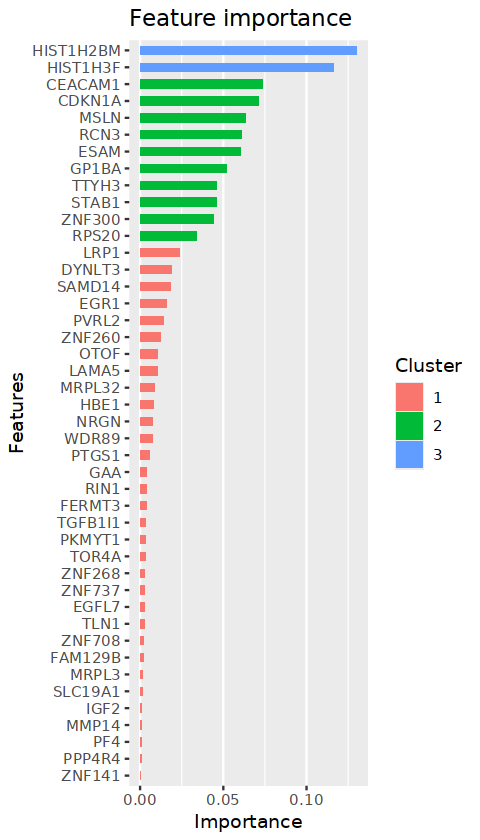

In [43]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

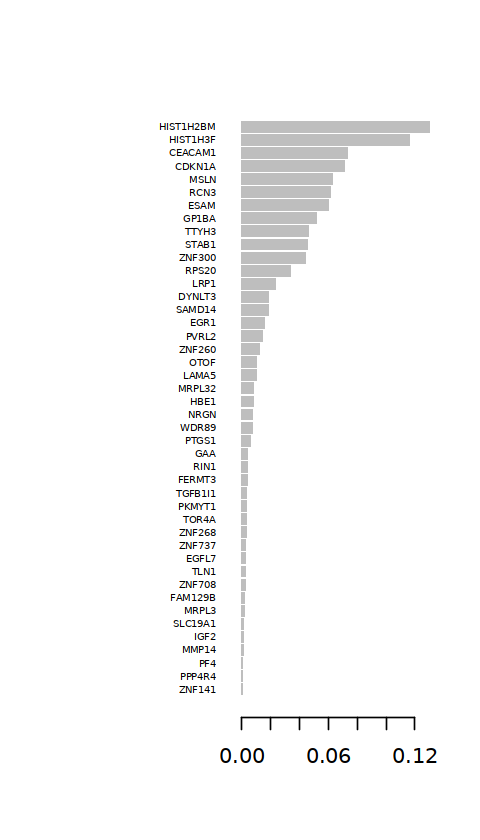

In [44]:
xgb.plot.importance(importance)

In [45]:
# lasso

In [46]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loaded glmnet 4.1-8



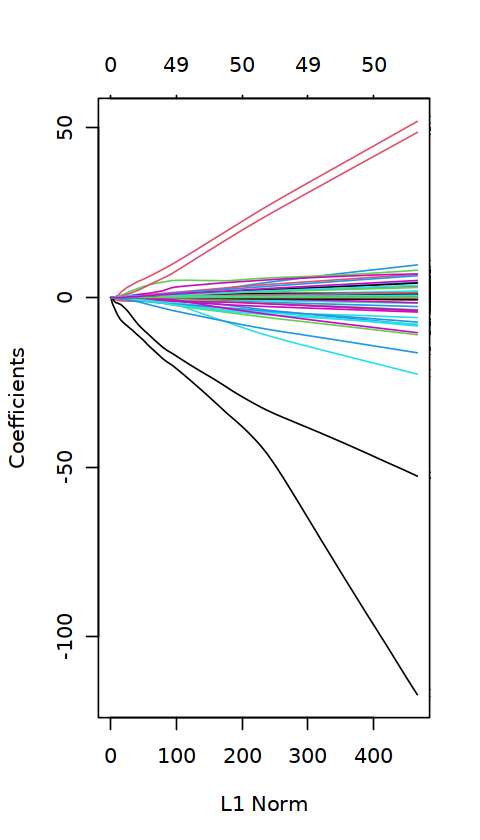

In [47]:
#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

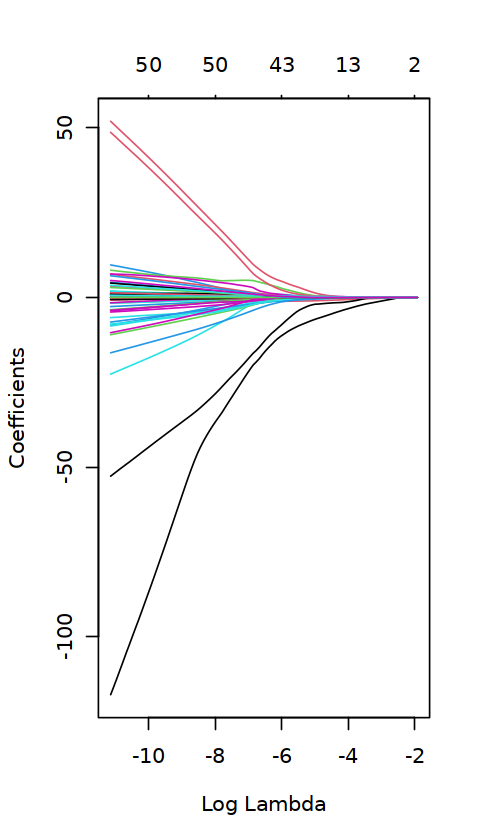

In [48]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [ ]:
cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

gene_1se

### 韦恩图

In [53]:
importance$Feature

[1] "HIST1H2BM" "HIST1H3F"  "CEACAM1"   "CDKN1A"    "MSLN"      "RCN3"     
 [7] "ESAM"      "GP1BA"     "TTYH3"     "STAB1"     "ZNF300"    "RPS20"    
[13] "LRP1"      "DYNLT3"    "SAMD14"    "EGR1"      "PVRL2"     "ZNF260"   
[19] "OTOF"      "LAMA5"     "MRPL32"    "HBE1"      "NRGN"      "WDR89"    
[25] "PTGS1"     "GAA"       "RIN1"      "FERMT3"    "TGFB1I1"   "PKMYT1"   
[31] "TOR4A"     "ZNF268"    "ZNF737"    "EGFL7"     "TLN1"      "ZNF708"   
[37] "FAM129B"   "MRPL3"     "SLC19A1"   "IGF2"      "MMP14"     "PF4"      
[43] "PPP4R4"    "ZNF141"

In [54]:
RF.gene = names(rfGenes)[1:10]
#SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature[1:10]

In [55]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

In [56]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [57]:
lasso.gene  = gene_1se

In [58]:
list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

In [59]:
data =  as.data.frame (do.call (cbind, list1))

Warning message in (function (..., deparse.level = 1) :
"number of rows of result is not a multiple of vector length (arg 1)"


In [60]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"
Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


png 
  2

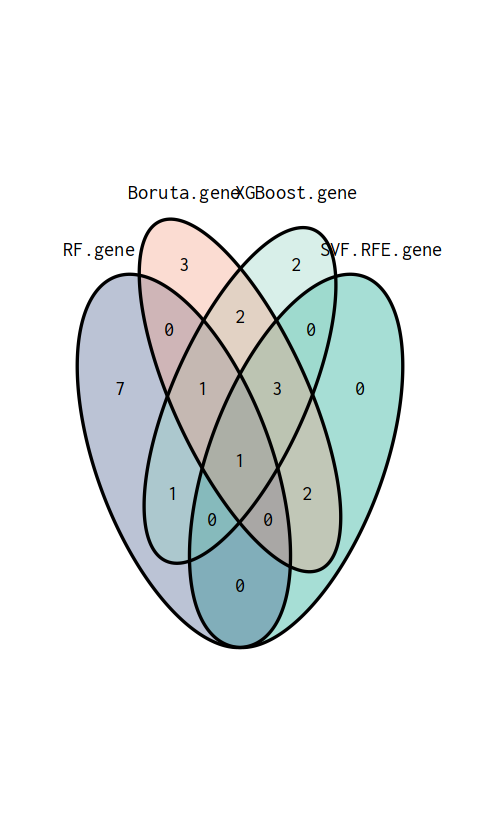

In [61]:
grid.draw(q)

In [62]:
intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

[1] "HIST1H2BM"

In [63]:
model.gene = intersect(lasso.gene,XGBoost.gene)

In [65]:
model.gene  =lasso.gene

In [66]:
model.gene

[1] "MSLN"      "HBE1"      "LRP1"      "CDKN1A"    "CEACAM1"   "HIST1H2BM"

In [67]:
set.seed(1234)

In [177]:
expr3 = expr

In [178]:
expr3[expr3$Group ==1,]$Group<-1

In [179]:

expr3[expr3$Group ==0,]$Group<-0
expr3$Group = as.numeric(expr3$Group)

In [180]:
table(Type)

Type
 0  1 
60 59 

In [181]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

In [182]:
dim(expr4)

[1] 119   7

In [183]:
head(expr4,7)

,Group,MSLN,HBE1,LRP1,CDKN1A,CEACAM1,HIST1H2BM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10_M1,1,0.001604972,0.13897265,6.989592,5.173722,6.247454,10.420602
CI11_M1,1,0.001604972,0.06789091,8.119331,5.430353,14.772961,3.172594
CI12_M1,1,0.024781435,0.02127094,10.765511,5.624813,9.417403,26.555932
CI13_M1,1,0.001604972,0.08047129,7.195428,9.627065,15.692822,12.907428
CI14_M1,1,0.001604972,0.02127094,7.797441,6.128547,6.429964,4.364496
CI15_M1,1,0.001604972,0.02127094,4.766591,2.575819,8.672950,9.328786
CI16_M1,1,0.044370190,0.07118132,10.448084,7.402613,8.574016,19.967648


In [184]:
# library(caret)
# library(ggplot2)

#  a = c()
# # 
# for (i in model.gene){
#     res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
#          ci=TRUE, # 显示95%CI
#          #percent=TRUE, # 是否需要以百分比显示
#          smooth=FALSE,# 是否平滑曲线
#          levels=c(0,1),direction="<" #设置分组方向
#          )
#     if (res$auc > 0.5){
#         a = append(a,i)
#         print(paste0(i,' ',res$auc))
#         p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
#   geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
#   theme_bw() + # 设置背景
#   ggtitle(paste0(i," ROC Curve"))+
#   theme(plot.title = element_text(hjust = 0.5,size = 16),
#         axis.text=element_text(size=12,colour = "black"),
#         axis.title.x = element_text(size = 14),
#         axis.title.y = element_text(size = 14))
# p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
#   annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
#     ggsave(file = paste0(i,'.ROC.pdf'))
# }else{
        
# }

    
#     }

### 批量单因素逻辑回归

In [185]:
#expr4 = expr3

In [186]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
MSLN,-16.1095093,7.19349472,-2.239455,0.025126312,1.008623e-07,1.510554e-14,0.01594259,MSLN
HBE1,-1.9570497,1.00239558,-1.952373,0.050893980,1.412746e-01,1.296534e-02,0.62612618,HBE1
LRP1,-0.1144501,0.04082757,-2.803255,0.005058968,8.918565e-01,8.188243e-01,0.96226745,LRP1
CDKN1A,-0.1655846,0.05500175,-3.010533,0.002607900,8.473982e-01,7.550589e-01,0.93829700,CDKN1A
CEACAM1,0.1846884,0.06094743,3.030291,0.002443183,1.202844e+00,1.076942e+00,1.36933586,CEACAM1
HIST1H2BM,0.1344959,0.04537201,2.964292,0.003033801,1.143960e+00,1.057502e+00,1.26126071,HIST1H2BM


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
MSLN,-16.1095093,0.025126312,1.008623e-07,1.510554e-14,0.01594259,MSLN
LRP1,-0.1144501,0.005058968,8.918565e-01,8.188243e-01,0.96226745,LRP1
CDKN1A,-0.1655846,0.002607900,8.473982e-01,7.550589e-01,0.93829700,CDKN1A
CEACAM1,0.1846884,0.002443183,1.202844e+00,1.076942e+00,1.36933586,CEACAM1
HIST1H2BM,0.1344959,0.003033801,1.143960e+00,1.057502e+00,1.26126071,HIST1H2BM


[1] "MSLN"      "LRP1"      "CDKN1A"    "CEACAM1"   "HIST1H2BM"

In [187]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.03704  -0.64127  -0.00676   0.73382   1.84055  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.34412    0.87762  -0.392  0.69498   
MSLN        -9.46684    8.76496  -1.080  0.28011   
LRP1        -0.11030    0.06030  -1.829  0.06738 . 
CDKN1A      -0.21721    0.08726  -2.489  0.01280 * 
CEACAM1      0.21948    0.06943   3.161  0.00157 **
HIST1H2BM    0.17799    0.06020   2.957  0.00311 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 164.96  on 118  degrees of freedom
Residual deviance: 106.57  on 113  degrees of freedom
AIC: 118.57

Number of Fisher Scoring iterations: 7


Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-0.344,0.154,0.709(0.121~3.854),0.695
MSLN,-9.467,1.167,0(0~2.225),0.280
LRP1,-0.110,3.346,0.896(0.788~1.003),0.067
CDKN1A,-0.217,6.196,0.805(0.667~0.943),0.013
CEACAM1,0.219,9.993,1.245(1.099~1.446),0.002
HIST1H2BM,0.178,8.743,1.195(1.081~1.364),0.003


In [188]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.03704  -0.64127  -0.00676   0.73382   1.84055  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.34412    0.87762  -0.392  0.69498   
MSLN        -9.46684    8.76496  -1.080  0.28011   
LRP1        -0.11030    0.06030  -1.829  0.06738 . 
CDKN1A      -0.21721    0.08726  -2.489  0.01280 * 
CEACAM1      0.21948    0.06943   3.161  0.00157 **
HIST1H2BM    0.17799    0.06020   2.957  0.00311 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 164.96  on 118  degrees of freedom
Residual deviance: 106.57  on 113  degrees of freedom
AIC: 118.57

Number of Fisher Scoring iterations: 7


In [189]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=118.57
Group ~ MSLN + LRP1 + CDKN1A + CEACAM1 + HIST1H2BM

            Df Deviance    AIC
<none>           106.57 118.57
- MSLN       1   109.38 119.38
- LRP1       1   110.22 120.22
- CDKN1A     1   114.13 124.13
- CEACAM1    1   120.12 130.12
- HIST1H2BM  1   129.64 139.64



Call:
glm(formula = Group ~ MSLN + LRP1 + CDKN1A + CEACAM1 + HIST1H2BM, 
    family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.03704  -0.64127  -0.00676   0.73382   1.84055  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.34412    0.87762  -0.392  0.69498   
MSLN        -9.46684    8.76496  -1.080  0.28011   
LRP1        -0.11030    0.06030  -1.829  0.06738 . 
CDKN1A      -0.21721    0.08726  -2.489  0.01280 * 
CEACAM1      0.21948    0.06943   3.161  0.00157 **
HIST1H2BM    0.17799    0.06020   2.957  0.00311 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 164.96  on 118  degrees of freedom
Residual deviance: 106.57  on 113  degrees of freedom
AIC: 118.57

Number of Fisher Scoring iterations: 7


In [190]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-0.344,0.154,0.709(0.121~3.854),0.695
MSLN,-9.467,1.167,0(0~2.225),0.280
LRP1,-0.110,3.346,0.896(0.788~1.003),0.067
CDKN1A,-0.217,6.196,0.805(0.667~0.943),0.013
CEACAM1,0.219,9.993,1.245(1.099~1.446),0.002
HIST1H2BM,0.178,8.743,1.195(1.081~1.364),0.003


In [191]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [192]:
save(b,file = 'b.rda')

In [193]:
data = data[,c('Group',b)]

In [194]:
library(autoReg)

In [195]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=60),1 (N=59),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MSLN,Mean <U+00B1> SD,0.1 <U+00B1> 0.2,0.0 <U+00B1> 0.0,MSLN,"0.00 (0.00-0.13, p=.025)","0.00 (0.00-2235.39, p=.280)"
LRP1,Mean <U+00B1> SD,11.6 <U+00B1> 5.7,8.8 <U+00B1> 4.3,LRP1,"0.89 (0.82-0.97, p=.005)","0.90 (0.80-1.01, p=.067)"
CDKN1A,Mean <U+00B1> SD,9.7 <U+00B1> 4.1,7.4 <U+00B1> 3.6,CDKN1A,"0.85 (0.76-0.94, p=.003)","0.80 (0.68-0.95, p=.013)"
CEACAM1,Mean <U+00B1> SD,7.2 <U+00B1> 3.2,10.7 <U+00B1> 9.7,CEACAM1,"1.20 (1.07-1.36, p=.002)","1.25 (1.09-1.43, p=.002)"
HIST1H2BM,Mean <U+00B1> SD,6.8 <U+00B1> 3.4,14.1 <U+00B1> 17.9,HIST1H2BM,"1.14 (1.05-1.25, p=.003)","1.19 (1.06-1.34, p=.003)"


In [196]:
library(caret)

In [197]:
set.seed(211)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.8142646

In [198]:
auc_value

[1] 0.7361111 0.8257576 0.9370629 0.7847222 0.8142857 0.8296296 0.7902098
 [8] 0.8472222 0.6825397 0.8951049

In [199]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 3


Setting levels: control = 0, case = 1

Setting direction: controls < cases



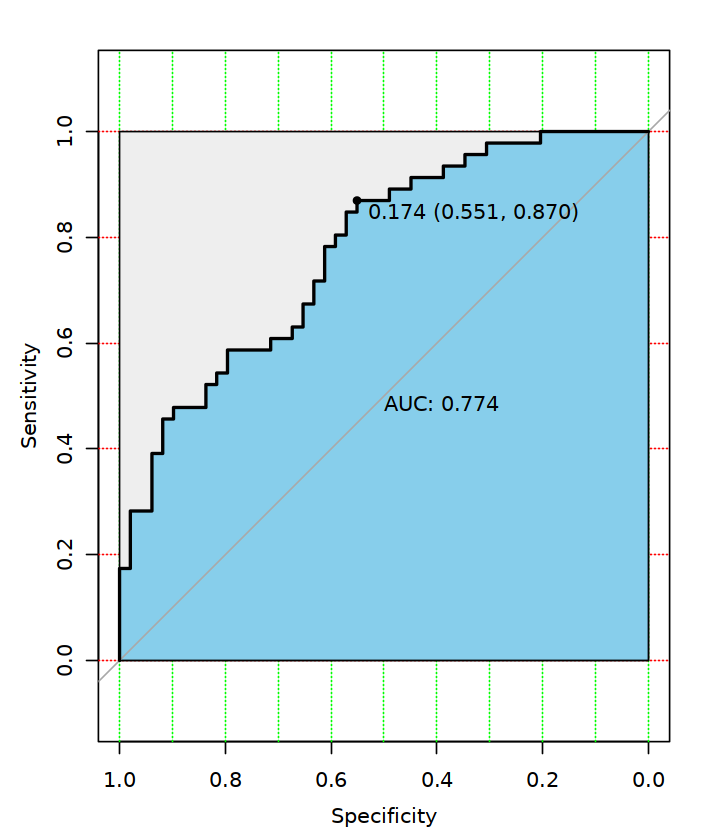

In [200]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



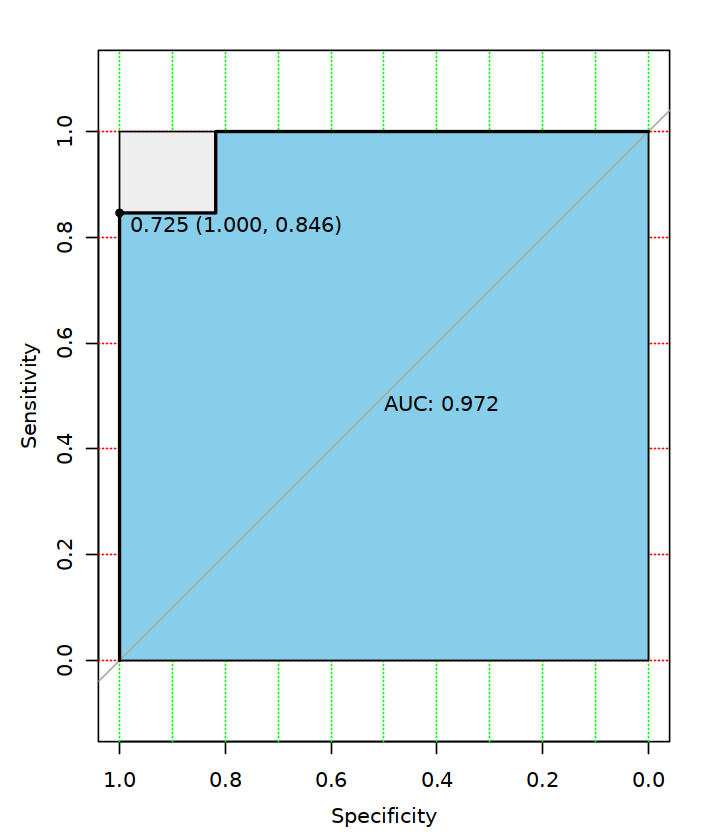

In [201]:
fold_predict <- predict(fold_pre,type='response',newdata=fold_train)
roc_curve <- pROC::roc(as.numeric(fold_train$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [142]:
summary(fit.reduce) #查看构建的模型
fitted.prob<-predict(fit.reduce, newdata = data, type = "response")  #这里不需要变动
data$pred<-fit.reduce$fitted.values
m<-pROC::roc(data$Group,data[,"pred"])  #这里要把Y改为自己的结局变量即可


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8621  -0.8188  -0.5152   0.8754   2.7699  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -46.2713    10.5384  -4.391 1.13e-05 ***
BAIAP3        1.7200     0.5653   3.043  0.00234 ** 
RIT2          0.6194     0.4918   1.259  0.20790    
IDH3B        -0.3179     1.0021  -0.317  0.75106    
REPS2         0.6632     0.9322   0.711  0.47680    
PRSS3         0.5860     0.3329   1.760  0.07835 .  
STUB1         0.4706     0.5388   0.873  0.38244    
DYNC1I1      -0.1712     0.5493  -0.312  0.75527    
PIM2          0.9542     0.6568   1.453  0.14626    
PORCN        -0.1135     0.9019  -0.126  0.89983    
POLR2C        1.3867     1.0373   1.337  0.18130    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 307.83  on 250  degrees 

ERROR: Error in eval(predvars, data, env): object 'IDH3B' not found


In [ ]:
options(repr.plot.width = 6)

In [ ]:
g <- pROC::ggroc(m,legacy.axes = T,size = 1,color = "#2fa1dd")
pROC::auc(m)  # Area under the curve: 0.9953

g + theme_minimal() +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), 
               colour = "grey", linetype = "dashed")+
  annotate("text",x = .75, y = .25,
           label = paste("AUC of min = ",format(round(as.numeric(pROC::auc(m)),2),nsmall = 2)),color = "#2fa1dd")

In [ ]:
library(ROCR)

In [102]:
dd<-datadist(data)  #开始打包数据
options(datadist="dd")

In [103]:
data$Group = as.factor(data$Group)

In [104]:
fit1 <- lrm(Group~RPE65 + DRD3+ MC3R+RELB  + PRF1, data=data,x=T,y=T)


In [105]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [106]:
#  https://blog.csdn.net/Ayue0616/article/details/126601832

In [107]:
# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

In [117]:
# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

In [ ]:
# https://blog.csdn.net/Dr_long1996/article/details/135446784

In [118]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [109]:
save(fit1,data,file = 'bulk2.fit1.rda')

In [110]:
#列线图代码只能在Rstudio话

In [111]:
# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

In [112]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)

Waiting for profiling to be done...



In [116]:
library(forestplot)
fp<-read.csv("forestplot_example.csv",header=T)

# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=0,
#            boxsize=0.2,
#            graph.pos=2)

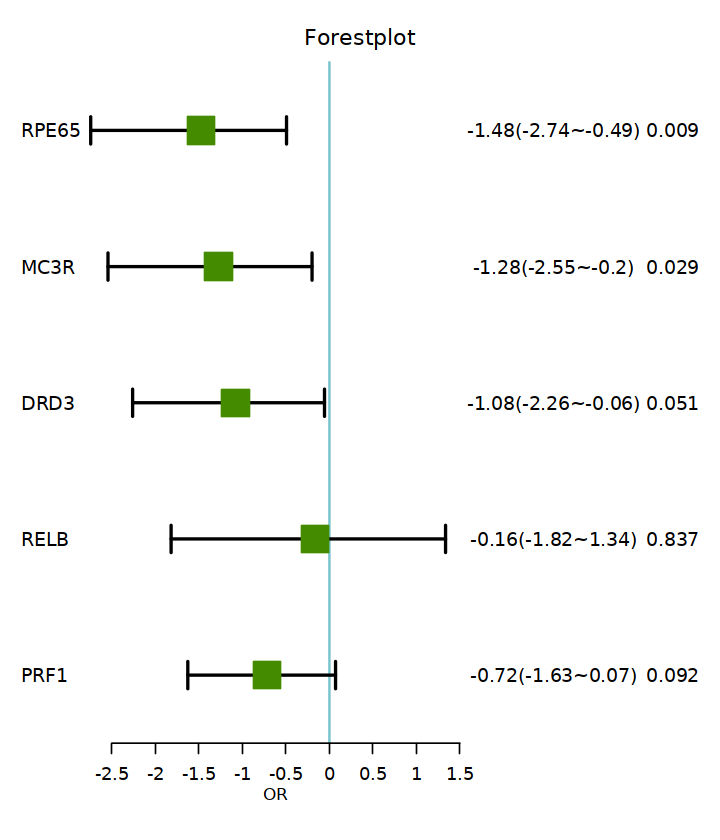

In [115]:
forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           lineheight = unit(7,'mm'),
           colgap=unit(2,'mm'),
           lwd.zero=1.5,
           lwd.ci=2, 
           col=fpColors(box='#458B00',
                        summary='#8B008B',
                        lines = 'black',
                        zero = '#7AC5CD'),
           xlab="OR",
           lwd.xaxis =1,
           txt_gp = fpTxtGp(ticks = gpar(cex = 0.85),
                            xlab  = gpar(cex = 0.8),
                            cex = 0.9),
           lty.ci = "solid",
           title = "Forestplot", 
           line.margin = 0.08,
           graph.pos=2)


In [209]:
nmfinput= data[MDD,c('RPE65' ,'DRD3','MC3R','RELB' , 'PRF1')] %>%  t() %>%  as.data.frame()

In [210]:
library(NMF)

In [211]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_point()`)."


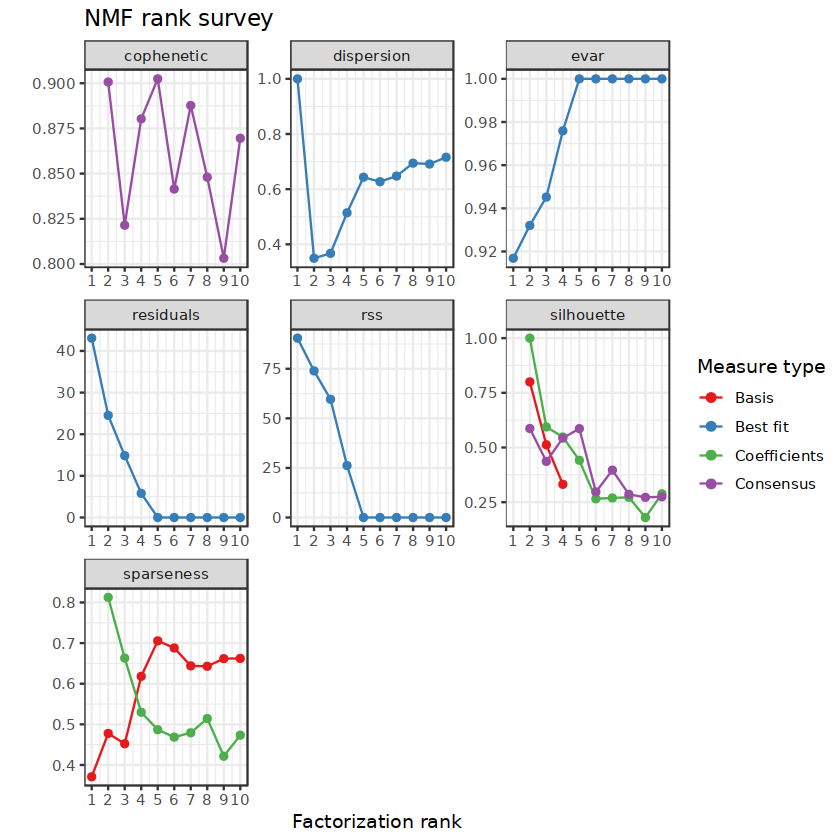

In [212]:
plot(estim.coad)

In [213]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
21  9 

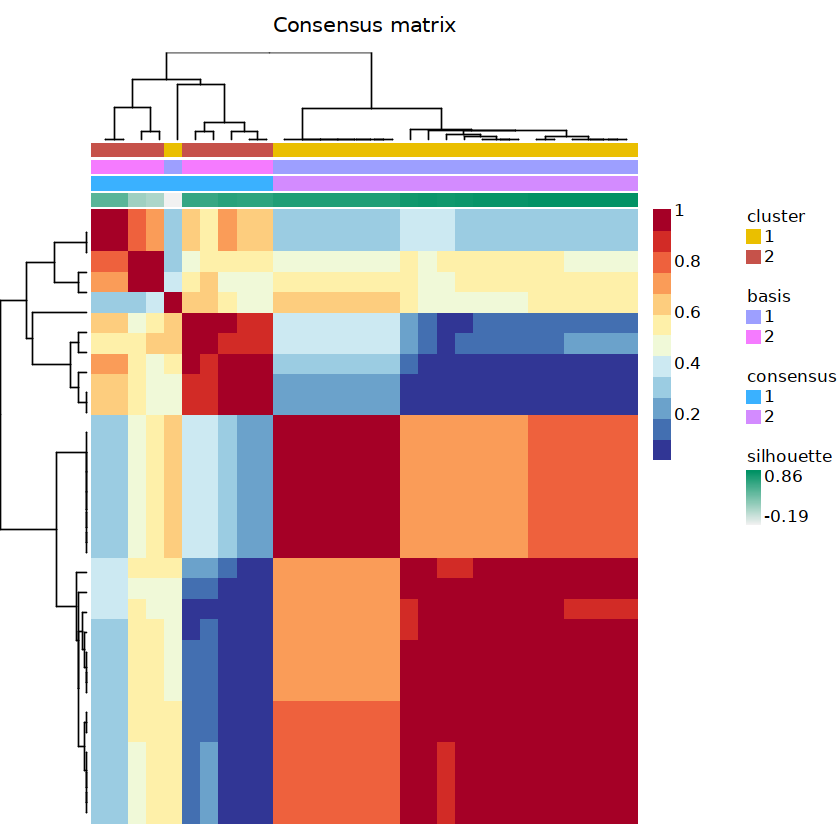

In [214]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [215]:
library(tinyarray)

In [225]:
data1 = data[MDD,-1] %>%  t() %>% as.data.frame()

In [226]:
a = data1[,colnames(nmfinput)]

In [227]:
cg=names(tail(sort(apply(a,1,sd)),12000))
n=a[cg,]

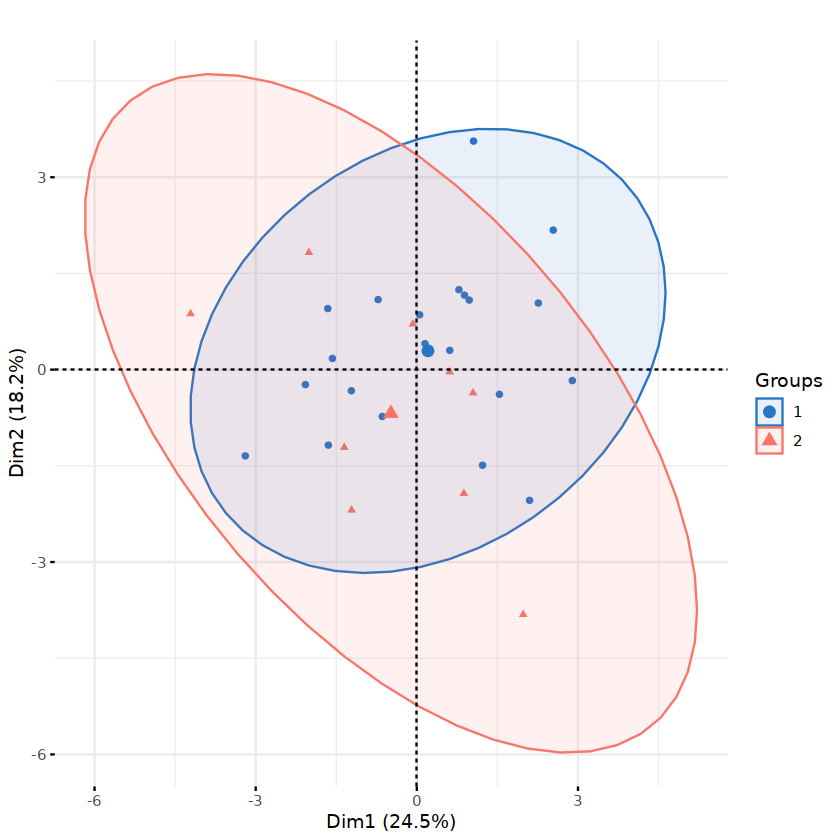

In [228]:
draw_pca(n,group)

In [231]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
V10,49.59959,172.010281,2
V15,207.23713,-79.947753,2
V16,201.56723,-89.036425,1
V18,-43.43508,3.824127,2
V19,-185.23555,98.308446,1
V20,-37.09595,-82.671437,1


In [294]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [295]:
bulk2.group = pdat1[,c(1,4)]
write.csv(bulk2.group,file = 'bulk2.group.csv',row.names =F)

In [296]:
dim(bulk2.group)

[1] 30  2

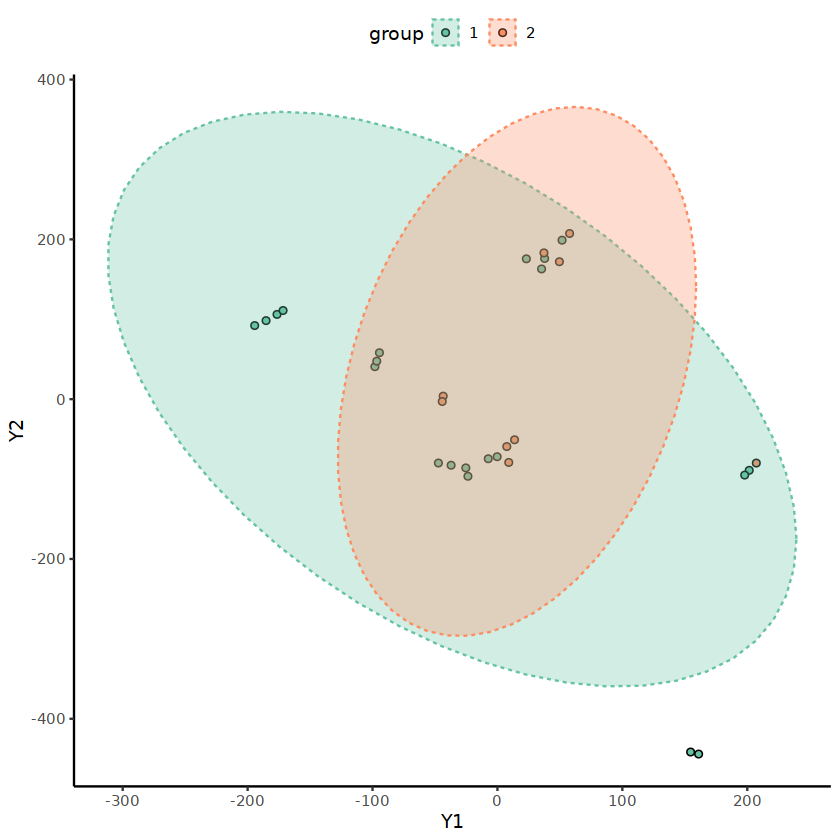

In [232]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")